# Naive Scheduler

In [1]:
import sys
sys.path.append("..")

from NaiveScheduler import testJob, naiveScheduler
print(testJob(2,2,2,"bobby"))

In [2]:
from typing import List

# A function to draw a list of jobs with a timestamp
def showJobsStatus(jobs: List[testJob], timestamp: int|float) -> None:
    running = list(map(lambda x : x.name, list(filter(lambda dev: dev.running, jobs))))
    finished = list(map(lambda x : x.name, list(filter(lambda dev: dev.finished, jobs))))
    print(timestamp, "running:", running, "finished:",finished)

In [3]:
jobs = [testJob(2,2,20, "1"), testJob(2,3,20, "2"), testJob(3,1,10, "3"), testJob(3,2,15,"bobby")]

sch = naiveScheduler(jobs,1,1)

for i in range(0,20):
    sch.run(i,i*0.5)
    showJobsStatus(jobs,i)

0 running: [] finished: []
1 running: [] finished: []
2 running: ['3'] finished: []
3 running: ['3'] finished: []
4 running: ['1', '3'] finished: []
5 running: ['1'] finished: ['3']
6 running: ['2'] finished: ['1', '3']
7 running: ['2'] finished: ['1', '3']
8 running: ['bobby'] finished: ['1', '2', '3']
9 running: ['bobby'] finished: ['1', '2', '3']
10 running: ['bobby'] finished: ['1', '2', '3']
11 running: [] finished: ['1', '2', '3', 'bobby']
12 running: [] finished: ['1', '2', '3', 'bobby']
13 running: [] finished: ['1', '2', '3', 'bobby']
14 running: [] finished: ['1', '2', '3', 'bobby']
15 running: [] finished: ['1', '2', '3', 'bobby']
16 running: [] finished: ['1', '2', '3', 'bobby']
17 running: [] finished: ['1', '2', '3', 'bobby']
18 running: [] finished: ['1', '2', '3', 'bobby']
19 running: [] finished: ['1', '2', '3', 'bobby']


# forecasting scheduler

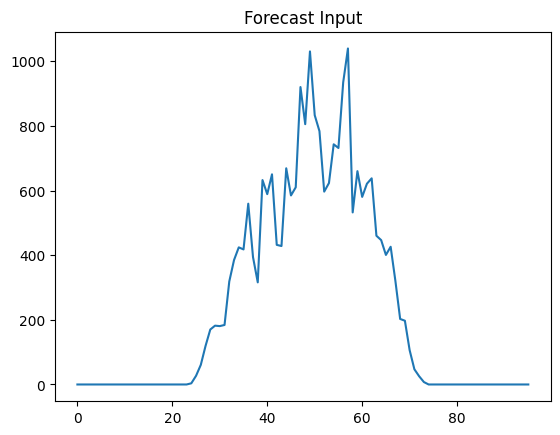

In [4]:
from Production.Prod_device import Solar_power_device_demo
import matplotlib.pyplot as plt
prod = Solar_power_device_demo("Plant_1_Generation_Data.csv")
prod.counter = 96

plt.figure()
plt.title("Forecast Input")
plt.plot(prod.get_history())

96


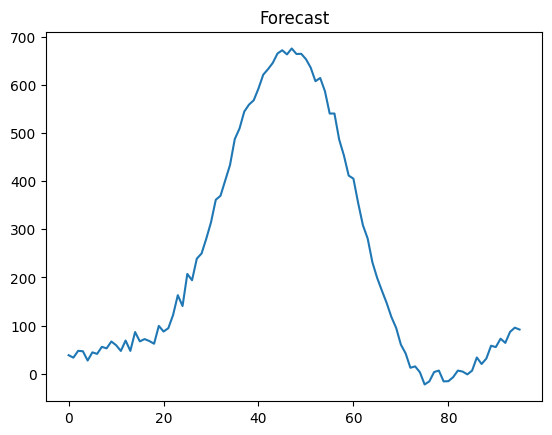

In [5]:
from Schedule.ForecastScheduler import ForecastScheduler
from datetime import datetime

jobs = [testJob(3000,500, datetime.now().timestamp() + 50000,"steve"), testJob(3600,200,0,"zero")]

print(len(prod.get_history()))
sch = ForecastScheduler(jobs,0,0,prod, 86400)

plt.figure()
plt.title("Forecast")
plt.plot(sch.forecast)

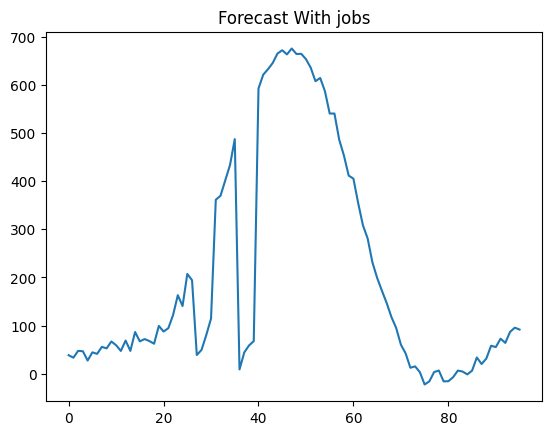

In [6]:
sch.run(datetime.now().timestamp(), 42)

plt.figure()
plt.title("Forecast With jobs")
plt.plot(sch.forecast)

In [7]:
jobs[0].__dict__

{'device': <Device.Device_Base.Device at 0x190fcd60e50>,
 'duration': 3000,
 'draw': 500,
 'deadline': 1682714692.168105,
 'earliestStart': 0,
 'daysToRun': [],
 'started': 1682697097.958428,
 'name': 'steve',
 'deviceCommand': <bound method testJob.start of <NaiveScheduler.testJob object at 0x00000190FCD60490>>,
 'running': False,
 'finished': False}

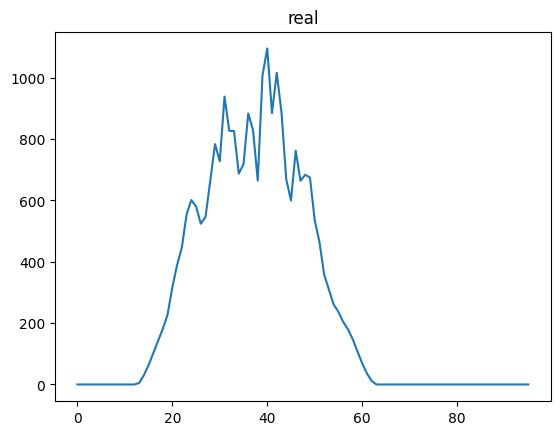

In [8]:
prod.counter = 96 * 2

plt.figure()
plt.title("real")
plt.plot(prod.get_history())


# Going ham with forecasting scheduler

96


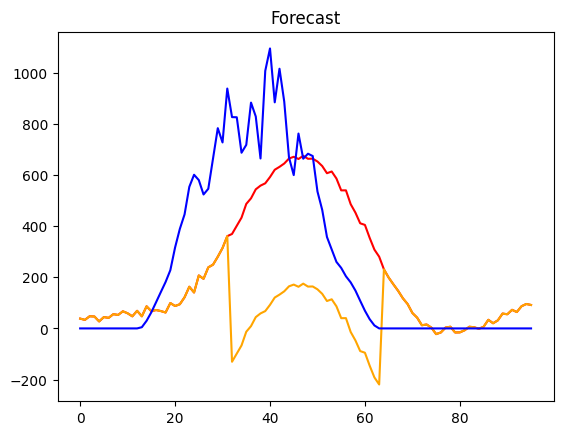

In [13]:
from Schedule.ForecastScheduler import ForecastScheduler
from datetime import datetime

jobs = [testJob(3600,500, 0,"steve") for _ in range(8)]

prod.counter = 96

print(len(prod.get_history()))
sch = ForecastScheduler(jobs,0,0,prod, 5000)
plt.figure()
plt.plot(sch.forecast, color= "red")
sch.run(datetime.now().timestamp(),42)

plt.title("Forecast")
plt.plot(sch.forecast, color="orange")
prod.counter += 96
plt.plot(prod.get_history(), color= "blue")

In [10]:
for job in jobs:
    print(job.started)

1682697104.106741
1682700704.106741
1682704304.106741
1682707904.106741
1682711504.106741
1682715104.106741
1682693504.106741
1682718704.106741


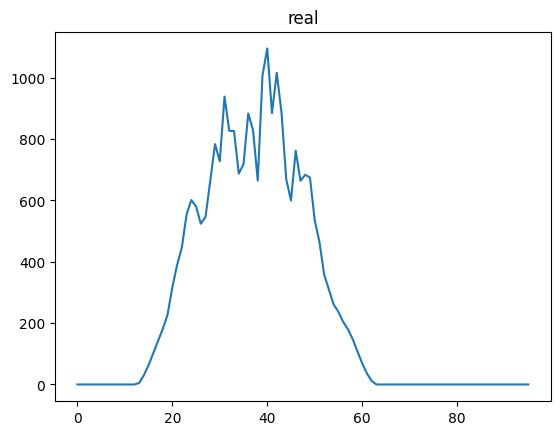

In [11]:
prod.counter = 96*2

plt.figure()
plt.title("real")
plt.plot(prod.get_history())